In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [3]:
df= pd.read_csv("phishing_site_urls.csv")

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [6]:
df.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [7]:
df = df.drop_duplicates()

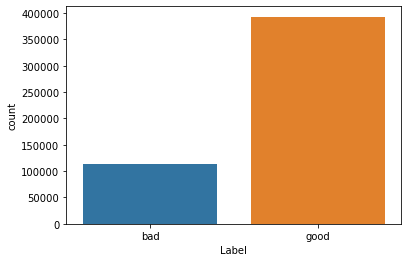

In [8]:
sns.countplot(x="Label",data=df)

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [11]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [12]:
root_words = SnowballStemmer("english")
df['root_words'] = df['text_tokenized'].map(lambda l: [root_words.stem(word) for word in l])

In [13]:
df.head()

,URL,Label,text_tokenized,root_words
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [14]:
df['text_sent'] = df['root_words'].map(lambda l: ' '.join(l))
df.head()

,URL,Label,text_tokenized,root_words,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [15]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']
bad_sites.head()


,URL,Label,text_tokenized,root_words,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [16]:
good_sites.head()

,URL,Label,text_tokenized,root_words,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [17]:
print(list(STOPWORDS)[:10])

['a', 'are', 'on', 'from', "that's", 'yourselves', "why's", "we've", 'an', "don't"]


In [20]:
c = CountVectorizer()
cv = c.fit_transform(df.text_sent)

In [22]:
print(list(c.vocabulary_)[:10])

['nobel', 'it', 'ffb', 'dca', 'cce', 'login', 'skype', 'com', 'en', 'cgi']


In [23]:
print('The length of vocabulary', len(c.get_feature_names()))
print('The shape is', cv.shape)

The length of vocabulary 350837
The shape is (507196, 350837)


In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(cv, df.Label,test_size=0.3, random_state=5)

#### KNN

In [25]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(Xtrain, Ytrain)
print(model)

KNeighborsClassifier(n_neighbors=2)


In [26]:
predictions_KNN = model.predict(Xtest)

In [40]:
acc_KNN = accuracy_score(predictions_KNN, Ytest)*100

In [41]:
print("KNeighbors Classifier Accuracy Score -> ",acc_KNN)

KNeighbors Classifier Accuracy Score ->  90.95091318949257


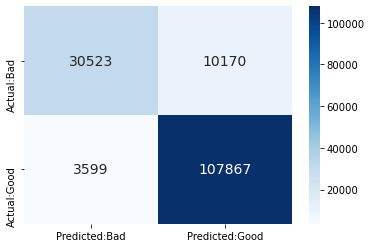

In [28]:
con_mat = pd.DataFrame(confusion_matrix(predictions_KNN, Ytest),columns = ['Predicted:Bad', 'Predicted:Good'],index = ['Actual:Bad', 'Actual:Good'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [29]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(predictions_KNN, Ytest, target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.89      0.75      0.82     40693
        Good       0.91      0.97      0.94    111466

    accuracy                           0.91    152159
   macro avg       0.90      0.86      0.88    152159
weighted avg       0.91      0.91      0.91    152159



#### LR

In [30]:
lr = LogisticRegression(max_iter=507197)
lr.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=507197)

In [31]:
predictions_LR = lr.predict(Xtest)

In [42]:
acc_LR = accuracy_score(predictions_LR, Ytest)*100

In [43]:
print("Logistic Regression Accuracy Score -> ",acc_LR)

Logistic Regression Accuracy Score ->  96.44122266839294


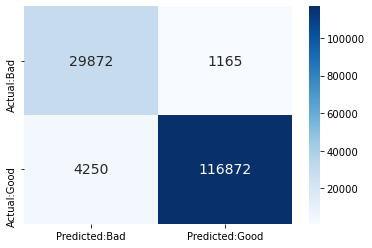

In [33]:
con_mat = pd.DataFrame(confusion_matrix(predictions_LR, Ytest),columns = ['Predicted:Bad', 'Predicted:Good'],index = ['Actual:Bad', 'Actual:Good'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [34]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(predictions_LR, Ytest, target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.88      0.96      0.92     31037
        Good       0.99      0.96      0.98    121122

    accuracy                           0.96    152159
   macro avg       0.93      0.96      0.95    152159
weighted avg       0.97      0.96      0.97    152159



#### NB

In [35]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Xtrain,Ytrain)

MultinomialNB()

In [36]:
predictions_NB = Naive.predict(Xtest)

In [44]:
acc_NB = accuracy_score(predictions_NB, Ytest)*100

In [45]:
print("Naive Bayes Accuracy Score -> ",acc_NB)

Naive Bayes Accuracy Score ->  95.87536721455847


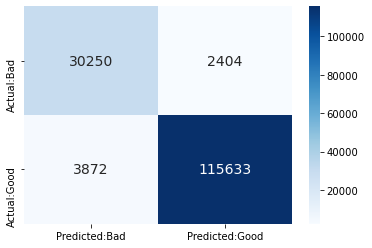

In [38]:
con_mat = pd.DataFrame(confusion_matrix(predictions_NB, Ytest),columns = ['Predicted:Bad', 'Predicted:Good'],index = ['Actual:Bad', 'Actual:Good'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [39]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(predictions_NB, Ytest, target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.89      0.93      0.91     32654
        Good       0.98      0.97      0.97    119505

    accuracy                           0.96    152159
   macro avg       0.93      0.95      0.94    152159
weighted avg       0.96      0.96      0.96    152159



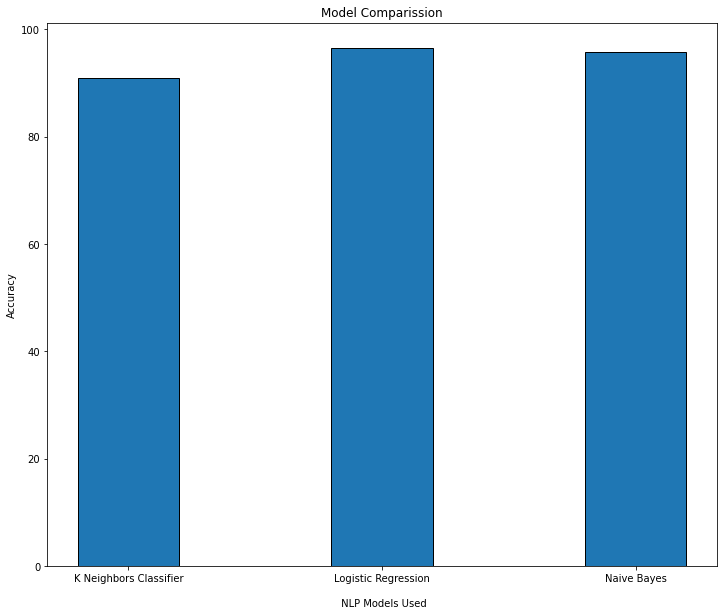

In [64]:
acc_list = {'K Neighbors Classifier':acc_KNN, 'Logistic Regression':acc_LR, 'Naive Bayes':acc_NB}
models = list(acc_list.keys())
acc_val = list(acc_list.values())

fig = plt.figure(figsize = (12, 10))
 
plt.bar(models, acc_val, width = 0.4, edgecolor='black')
 
plt.xlabel("\n NLP Models Used")
plt.ylabel("Accuracy")
plt.title("Model Comparission")
plt.show()

In [65]:
Xtrainf, Xtestf, Ytrainf, Ytestf = train_test_split(df.URL, df.Label,test_size=0.3, random_state=5)

In [66]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression(max_iter=507197))

In [67]:
pipeline_ls.fit(Xtrainf,Ytrainf)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression(max_iter=507197))])

In [77]:
bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt','https://www.gfpcommission.com', 'https://www.schwackepuppies.co.za ']
good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','bestbuy.com/','restorevisioncenters.com/html/technology.html', 'https://en.wikipedia.org/wiki/Dance']

result1 = pipeline_ls.predict(bad)
result2 = pipeline_ls.predict(good)

print(result1)
print(result2)

['bad' 'bad' 'bad' 'bad' 'bad' 'bad']
['good' 'good' 'good' 'good' 'good']
